In [299]:
#import gdal
from osgeo import gdal
from numpy import *

import matplotlib.pyplot as plt
%matplotlib inline

import rasterio
from rasterio import plot

from spectral import *
import spectral.io.envi

from rasterio.plot import show

import pandas as pd
import geopandas

import shapely
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely import wkt
from shapely.geometry import shape, mapping

#import shapely.wkt
import shapely.geometry as geometry

import numpy as np

In [ ]:
s = np.loadtxt("")

In [300]:
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos_2017/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("Monospecies_Reg_Ecos_2017/FF_SingleSp_RE_2017_V11.shp")
eucmg = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")
eucmgs = eucmg[['RE', 'Descriptio', 'geometry']].copy()
noneucs = noneuc[['RE', 'Descriptio', 'geometry']].copy()
eucs = euc[['QLD_REG_EC','FF_singl_7','geometry']].copy()
eucs.rename(columns={'QLD_REG_EC': 'RE', 'FF_singl_7': 'Descriptio', 'geometry': 'geometry'}, inplace=True)
eucs['euc'] = 1
eucmgs['euc'] = 1
noneucs['euc'] = 0
merged = eucs.append(eucmgs,sort=False)
fpdf = merged.append(noneucs,sort=False)


In [239]:
noneucs.iloc[23]

RE                                                     10.3.29a
Descriptio    Acacia torulosa dominates the very sparse cano...
geometry      POLYGON ((145.3615624800001 -22.24157405599993...
euc                                                           0
Name: 23, dtype: object

In [237]:
desc = fpdf[['RE', 'Descriptio','euc']].copy()

In [238]:
desc

,RE,Descriptio,euc
0,11.5.9a,Eucalyptus melanophloia woodland. (BVG1M: 17...,1
1,11.5.9a,Eucalyptus melanophloia woodland. (BVG1M: 17...,1
2,11.5.9a,Eucalyptus melanophloia woodland. (BVG1M: 17...,1
3,6.5.17a,Eucalyptus melanophloia and Callitris glaucoph...,1
4,6.5.17a,Eucalyptus melanophloia and Callitris glaucoph...,1
...,...,...,...
74897,None,None,0
74898,None,None,0
74899,None,None,0
74900,None,None,0


In [241]:
desc.to_csv("REDesc.txt",sep=" ", index=False)

In [301]:
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos_2017/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("Monospecies_Reg_Ecos_2017/FF_SingleSp_RE_2017_V11.shp")
eucmg = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")

ucl = euc['QLD_REG_EC'].unique().tolist()
uclm = eucmg['RE'].unique().tolist()

uclb = ucl + uclm

euco = {k: v for v, k in enumerate(ucl)} 

nonucl = noneuc['RE'].unique().tolist()
noneuco = {k: v for v, k in enumerate(nonucl)}

zg = {**euco, **noneuco}
import copy
zgz = copy.deepcopy(zg)
counter = 10
zk = list(zgz.keys())
for p in range(0,len(zgz)):
    zgz[zk[p]] = counter
    counter += 1

In [71]:
import json
from shapely.geometry import shape, GeometryCollection

with open("australian-states.json") as f:
    features = json.load(f)["features"]

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates 
x = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])

queensland = x[2]

In [ ]:
Loc11346_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc11346_g731.json').geometry.values[0]])
Loc11346_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc14773_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc14773_g731.json').geometry.values[0]])
Loc14773_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc14864_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc14864_g731.json').geometry.values[0]])
Loc14864_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1715_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1715_g731.json').geometry.values[0]])
Loc1715_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1718_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1718_g731.json').geometry.values[0]])
Loc1718_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1744_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1744_g731.json').geometry.values[0]])
Loc1744_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc18186_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc18186_g731.json').geometry.values[0]])
Loc18186_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1823_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1823_g731.json').geometry.values[0]])
Loc1823_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1863_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1863_g731.json').geometry.values[0]])
Loc1863_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1885_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1885_g731.json').geometry.values[0]])
Loc1885_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc18892_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc18892_g731.json').geometry.values[0]])
Loc18892_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19054_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19054_g731.json').geometry.values[0]])
Loc19054_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1939_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1939_g731.json').geometry.values[0]])
Loc1939_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19605_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19605_g731.json').geometry.values[0]])
Loc19605_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19714_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19714_g731.json').geometry.values[0]])
Loc19714_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19771_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19771_g731.json').geometry.values[0]])
Loc19771_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19999_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19999_g731.json').geometry.values[0]])
Loc19999_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20077_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20077_g731.json').geometry.values[0]])
Loc20077_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20114_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20114_g731.json').geometry.values[0]])
Loc20114_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20500_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20500_g731.json').geometry.values[0]])
Loc20500_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20506_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20506_g731.json').geometry.values[0]])
Loc20506_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20577_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20577_g731.json').geometry.values[0]])
Loc20577_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20606_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20606_g731.json').geometry.values[0]])
Loc20606_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc207_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc207_g731.json').geometry.values[0]])
Loc207_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20906_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20906_g731.json').geometry.values[0]])
Loc20906_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc22370_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc22370_g731.json').geometry.values[0]])
Loc22370_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc22846_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc22846_g731.json').geometry.values[0]])
Loc22846_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23355_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23355_g731.json').geometry.values[0]])
Loc23355_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23380_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23380_g731.json').geometry.values[0]])
Loc23380_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23427_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23427_g731.json').geometry.values[0]])
Loc23427_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23674_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23674_g731.json').geometry.values[0]])
Loc23674_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23678_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23678_g731.json').geometry.values[0]])
Loc23678_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc25258_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc25258_g731.json').geometry.values[0]])
Loc25258_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc25633_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc25633_g731.json').geometry.values[0]])
Loc25633_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26509_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26509_g731.json').geometry.values[0]])
Loc26509_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26563_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26563_g731.json').geometry.values[0]])
Loc26563_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26753_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26753_g731.json').geometry.values[0]])
Loc26753_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26766_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26766_g731.json').geometry.values[0]])
Loc26766_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26919_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26919_g731.json').geometry.values[0]])
Loc26919_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc2915_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc2915_g731.json').geometry.values[0]])
Loc2915_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc34297_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc34297_g731.json').geometry.values[0]])
Loc34297_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc3592_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc3592_g731.json').geometry.values[0]])
Loc3592_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc4033_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc4033_g731.json').geometry.values[0]])
Loc4033_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc4259_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc4259_g731.json').geometry.values[0]])
Loc4259_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc5541_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc5541_g731.json').geometry.values[0]])
Loc5541_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc7608_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc7608_g731.json').geometry.values[0]])
Loc7608_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc813_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc813_g731.json').geometry.values[0]])
Loc813_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8952_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8952_g731.json').geometry.values[0]])
Loc8952_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8953_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8953_g731.json').geometry.values[0]])
Loc8953_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8957_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8957_g731.json').geometry.values[0]])
Loc8957_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8980_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8980_g731.json').geometry.values[0]])
Loc8980_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))

In [73]:

kirrama = Polygon([
                    [145.5744, -18.27014],
                    [145.78456, -18.27014],
                    [145.78456, -18.1522],
                    [145.5744, -18.1522],
                    [145.5744, -18.27014]
                ])

danbulla = Polygon([
                    [145.555, -17.275],
                    [145.755, -17.275],
                    [145.755, -17.00],
                    [145.555, -17.00],
                    [145.555, -17.275]
                ])

herberton = Polygon([
            [145.41327472275032, -17.36669084460675],
            [145.41327472275032, -17.55535805363121],
            [145.5425637008542, -17.55535805363121],
            [145.5425637008542, -17.36669084460675],
            [145.41327472275032, -17.36669084460675]
          ])    

mountbarney =  Polygon([[
              152.39999999999998,
              -28
            ],
            [
              152.39999999999998,
              -28.6
            ],
            [
              153,
              -28.6
            ],
            [
              153,
              -28
            ],
            [
              152.39999999999998,
              -28
            ]])

belyando =  Polygon([[
              146.8,
              -21.55
            ],
            [
              146.8,
              -21.95
            ],
            [
              147.2,
              -21.95
            ],
            [
              147.2,
              -21.55
            ],
            [
              146.8,
              -21.55
            ]])

andromache =  Polygon([[
              148.15,
              -20.35
            ],
            [
              148.15,
              -20.75
            ],
            [
              148.54999999999998,
              -20.75
            ],
            [
              148.54999999999998,
              -20.35
            ],
            [
              148.15,
              -20.35
            ]])

kirrama_gp = geopandas.GeoSeries([kirrama])
danbulla_gp = geopandas.GeoSeries([danbulla])
herberton_gp = geopandas.GeoSeries([herberton])
mountbarney_gp = geopandas.GeoSeries([mountbarney])
belyando_gp = geopandas.GeoSeries([belyando])
andromache_gp = geopandas.GeoSeries([andromache])

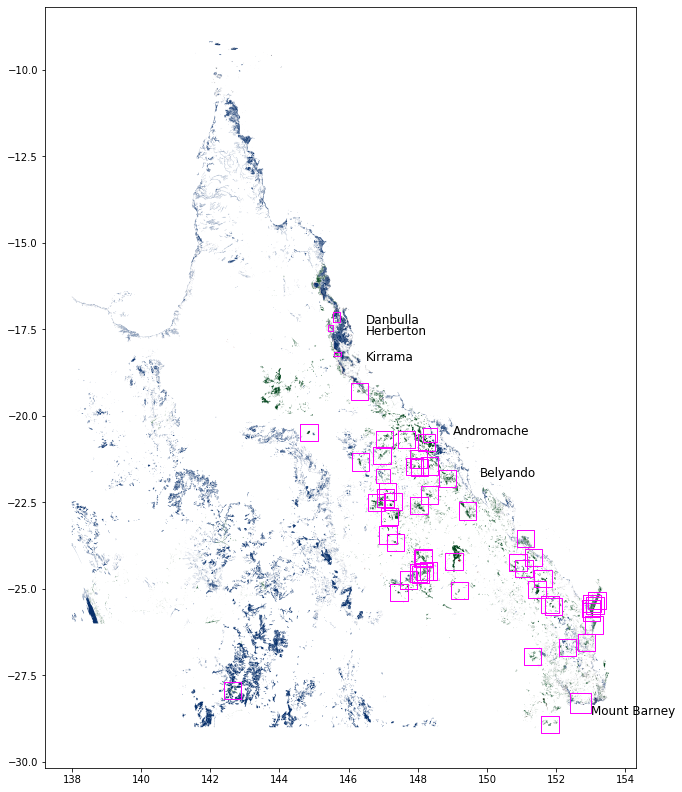

In [74]:
cmap_reds=plt.cm.get_cmap('Reds', 2)
cmap_blues=plt.cm.get_cmap('Blues', 2)
cmap_greens=plt.cm.get_cmap('Greens', 2)

fg=14

queensland_gs = geopandas.GeoSeries(queensland)
ax = queensland_gs.geometry.boundary.plot(color='grey',figsize=(fg,fg))
#ax = queensland.plot(color='black',figsize=(fg,fg))



noneuc.plot(ax=ax,color=cmap_blues(2),figsize=(fg,fg))
euc.plot(ax=ax,color=cmap_reds(2),figsize=(fg,fg))
eucmg.plot(ax=ax,color=cmap_greens(2),figsize=(fg,fg))

Loc11346_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc11346_g731.json').geometry.values[0]])
Loc11346_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc14773_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc14773_g731.json').geometry.values[0]])
Loc14773_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc14864_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc14864_g731.json').geometry.values[0]])
Loc14864_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1715_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1715_g731.json').geometry.values[0]])
Loc1715_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1718_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1718_g731.json').geometry.values[0]])
Loc1718_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1744_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1744_g731.json').geometry.values[0]])
Loc1744_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc18186_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc18186_g731.json').geometry.values[0]])
Loc18186_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1823_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1823_g731.json').geometry.values[0]])
Loc1823_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1863_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1863_g731.json').geometry.values[0]])
Loc1863_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1885_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1885_g731.json').geometry.values[0]])
Loc1885_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc18892_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc18892_g731.json').geometry.values[0]])
Loc18892_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19054_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19054_g731.json').geometry.values[0]])
Loc19054_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc1939_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc1939_g731.json').geometry.values[0]])
Loc1939_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19605_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19605_g731.json').geometry.values[0]])
Loc19605_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19714_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19714_g731.json').geometry.values[0]])
Loc19714_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19771_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19771_g731.json').geometry.values[0]])
Loc19771_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc19999_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc19999_g731.json').geometry.values[0]])
Loc19999_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20077_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20077_g731.json').geometry.values[0]])
Loc20077_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20114_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20114_g731.json').geometry.values[0]])
Loc20114_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20500_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20500_g731.json').geometry.values[0]])
Loc20500_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20506_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20506_g731.json').geometry.values[0]])
Loc20506_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20577_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20577_g731.json').geometry.values[0]])
Loc20577_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20606_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20606_g731.json').geometry.values[0]])
Loc20606_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc207_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc207_g731.json').geometry.values[0]])
Loc207_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc20906_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc20906_g731.json').geometry.values[0]])
Loc20906_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc22370_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc22370_g731.json').geometry.values[0]])
Loc22370_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc22846_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc22846_g731.json').geometry.values[0]])
Loc22846_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23355_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23355_g731.json').geometry.values[0]])
Loc23355_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23380_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23380_g731.json').geometry.values[0]])
Loc23380_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23427_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23427_g731.json').geometry.values[0]])
Loc23427_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23674_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23674_g731.json').geometry.values[0]])
Loc23674_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc23678_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc23678_g731.json').geometry.values[0]])
Loc23678_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc25258_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc25258_g731.json').geometry.values[0]])
Loc25258_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc25633_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc25633_g731.json').geometry.values[0]])
Loc25633_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26509_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26509_g731.json').geometry.values[0]])
Loc26509_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26563_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26563_g731.json').geometry.values[0]])
Loc26563_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26753_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26753_g731.json').geometry.values[0]])
Loc26753_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26766_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26766_g731.json').geometry.values[0]])
Loc26766_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc26919_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc26919_g731.json').geometry.values[0]])
Loc26919_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc2915_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc2915_g731.json').geometry.values[0]])
Loc2915_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc34297_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc34297_g731.json').geometry.values[0]])
Loc34297_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc3592_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc3592_g731.json').geometry.values[0]])
Loc3592_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc4033_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc4033_g731.json').geometry.values[0]])
Loc4033_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc4259_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc4259_g731.json').geometry.values[0]])
Loc4259_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc5541_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc5541_g731.json').geometry.values[0]])
Loc5541_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc7608_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc7608_g731.json').geometry.values[0]])
Loc7608_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc813_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc813_g731.json').geometry.values[0]])
Loc813_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8952_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8952_g731.json').geometry.values[0]])
Loc8952_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8953_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8953_g731.json').geometry.values[0]])
Loc8953_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8957_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8957_g731.json').geometry.values[0]])
Loc8957_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
Loc8980_gp = geopandas.GeoSeries([ geopandas.read_file('LandSat8_Loc8980_g731.json').geometry.values[0]])
Loc8980_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))


kirrama_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
plt.text(146.5, -18.4, "Kirrama", fontsize=12)
danbulla_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
plt.text(146.5, -17.32, "Danbulla", fontsize=12)
herberton_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
plt.text(146.5, -17.64, "Herberton", fontsize=12)
andromache_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
plt.text(149, -20.55, "Andromache", fontsize=12)
belyando_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
plt.text(149.8, -21.75, "Belyando", fontsize=12)
mountbarney_gp.plot(ax=ax,color='None',edgecolor='magenta',figsize=(fg,fg))
plt.text(153, -28.64, "Mount Barney", fontsize=12)
fg=12

In [7]:
locstats = pd.read_csv("par4.csv")

In [8]:
locstats

,location,CohensKappa,BalancedAccuracy,eucRatio,eucPAR,noneucPAR
0,belyando,0.527638,0.765137,1.041388,565.717716,502.762192
1,mountbarney,0.791877,0.892254,0.550500,1005.413166,769.759268
2,andromache,0.978250,0.988782,1.431952,110.433201,364.775554
3,kirrama,0.918187,0.961583,1.423434,632.170809,431.354046
4,danbulla,0.307828,0.808924,0.048085,1446.252913,912.048381
5,herberton,0.872247,0.933573,0.531126,1181.190560,669.939778
6,loc813Dec19,0.821402,0.903379,1.658750,141.712951,436.634017
7,loc7608Dec19,0.698033,0.862955,2.096347,592.611980,1206.492448
8,loc3592Dec19,0.798716,0.931452,4.222069,437.456707,729.671581
9,loc1823Dec19,0.724910,0.885288,2.044385,440.176251,568.051485


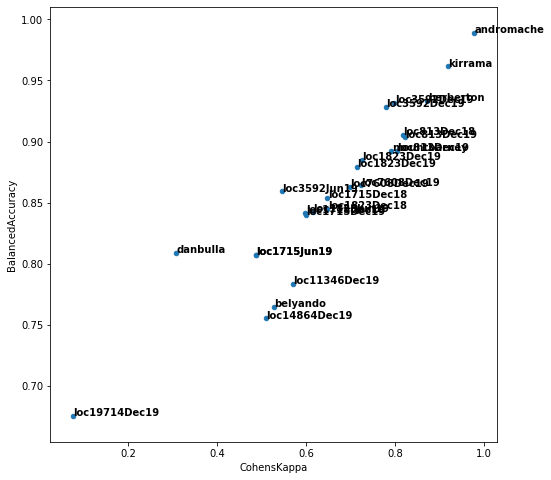

In [12]:

ax = locstats.plot.scatter(x="CohensKappa",y="BalancedAccuracy",figsize=(8,8))
for line in range(0,locstats.shape[0]):
     ax.text(locstats.CohensKappa[line]+0.001, locstats.BalancedAccuracy[line], locstats.location[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

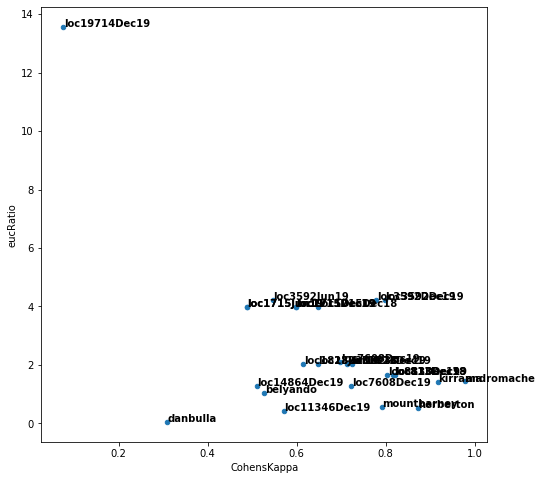

In [9]:
ax = locstats.plot.scatter(x="CohensKappa",y="eucRatio",figsize=(8,8))
for line in range(0,locstats.shape[0]):
     ax.text(locstats.CohensKappa[line]+0.001, locstats.eucRatio[line], locstats.location[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

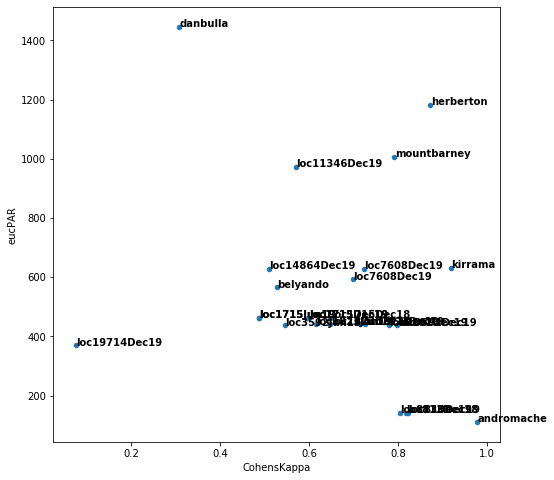

In [10]:
ax = locstats.plot.scatter(x="CohensKappa",y="eucPAR",figsize=(8,8))
for line in range(0,locstats.shape[0]):
     ax.text(locstats.CohensKappa[line]+0.001, locstats.eucPAR[line], locstats.location[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

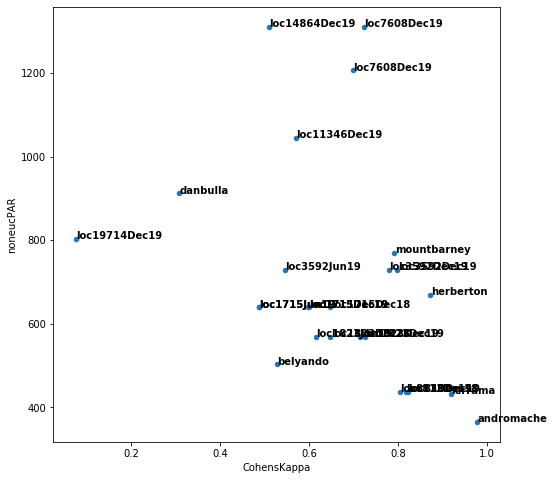

In [11]:
ax = locstats.plot.scatter(x="CohensKappa",y="noneucPAR",figsize=(8,8))
for line in range(0,locstats.shape[0]):
     ax.text(locstats.CohensKappa[line]+0.001, locstats.noneucPAR[line], locstats.location[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

In [3]:
blocstats = pd.read_csv("latest.csv")

In [ ]:
blocstats

In [4]:
locdec19 = blocstats[(blocstats["month"]=="Dec19") & (blocstats["CohensKappa"] > 0.0)]

In [ ]:
len(locdec19)

In [53]:
newsub = blocstats[['locmonth', 'lat', 'lon']].copy()
newsub

,locmonth,lat,lon
0,loc11346Dec19,152.318359,-26.703021
1,loc14773Jun19,152.871379,-26.560641
2,loc14864Dec19,153.089372,-26.042383
3,loc1715Dec18,148.016242,-24.543252
4,loc1715Dec19,148.016242,-24.543252
...,...,...,...
72,loc8952Dec19,153.033798,-25.430064
73,loc8953Dec19,153.120025,-25.484987
74,loc8953Jun18,153.120025,-25.484987
75,loc8957Dec19,153.024071,-25.666602


In [5]:
locdec19

,location,month,locmonth,jsonfile,landsatfile,landsatid,unlabeledpix,eucpix,noneucpix,unlabeledpixp,eucpixp,noneucpixp,eucRatio,eucPAR,noneucPAR,CohensKappa,BalancedAccuracy,lat,lon
0,loc11346,Dec19,loc11346Dec19,LandSat8_Loc11346_g731.json,loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd8...,LC08_L1TP_090079_20191215_20191226,2691384,119951.0,286329.0,0.868843,0.038723,0.092434,0.418927,973.514993,1045.454864,0.570725,0.783525,152.318359,-26.703021
2,loc14864,Dec19,loc14864Dec19,LandSat8_Loc14864_g731.json,loc14864Dec19/481301c0-2d37-4e69-8bbc-9679a6eb...,LC08_L1TP_090078_20191215_20191226,2384674,159665.0,124576.0,0.893499,0.059824,0.046677,1.281667,628.174277,1311.069329,0.509884,0.755415,153.089372,-26.042383
4,loc1715,Dec19,loc1715Dec19,LandSat8_Loc1715_g731.json,loc1715Dec19/a77d0301-3221-457d-90a1-0ca0c843c...,LC08_L1TP_093077_20191205_20191217,2529623,508665.0,127589.0,0.799028,0.160671,0.040301,3.986747,463.437985,639.249636,0.598529,0.841542,148.016242,-24.543252
7,loc1718,Dec19,loc1718Dec19,LandSat8_Loc1718_g731.json,loc1718Dec19/6673aedc-5e32-455e-ac1b-29b96e225...,LC08_L1TP_093077_20191205_20191217,2657765,489656.0,25584.0,0.837618,0.154319,0.008063,19.139149,507.337144,1134.823105,0.114148,0.750797,148.183249,-24.509285
13,loc1823,Dec19,loc1823Dec19,LandSat8_Loc1823_g731.json,loc1823Dec19/ffed8787-621b-45cd-9441-2cc4278fc...,LC08_L1TP_093077_20191205_20191217,2649121,334860.0,163795.0,0.841585,0.106380,0.052035,2.044385,440.176251,568.051485,0.713561,0.879196,147.722138,-24.743232
16,loc1863,Dec19,loc1863Dec19,LandSat8_Loc1863_g731.json,loc1863Dec19/4c8b785a-0ff1-4009-8577-99c582af5...,LC08_L1TP_093077_20191205_20191217,2581556,499407.0,86617.0,0.814993,0.157662,0.027345,5.765693,454.469168,716.653711,0.598356,0.848811,148.080178,-24.590461
17,loc1885,Dec19,loc1885Dec19,LandSat8_Loc1885_g731.json,loc1885Dec19/41a8b355-275d-4420-a1be-e1de6442b...,LC08_L1TP_093077_20191205_20191217,2774848,385914.0,21242.0,0.872044,0.121280,0.006676,18.167498,539.918814,1020.000427,0.404621,0.823141,148.310768,-24.487753
22,loc19605,Dec19,loc19605Dec19,LandSat8_Loc19605_g731.json,loc19605Dec19/5ec9b6c2-e1a3-4db5-ac8f-add0a6f8...,LC08_L1TP_093076_20191205_20191217,2764326,440236.0,4204.0,0.861492,0.137198,0.001310,104.718363,451.032368,1149.131564,0.031172,0.789387,148.029812,-22.594104
33,loc20577,Dec19,loc20577Dec19,LandSat8_Loc20577_g731.json,loc20577Dec19/76403873-9781-4a76-a133-084bae6c...,LC08_L1TP_094075_20191212_20191217,2873704,294005.0,35101.0,0.897245,0.091796,0.010959,8.375972,525.768155,793.316809,0.414589,0.777253,146.966094,-21.147229
38,loc20906,Dec19,loc20906Dec19,LandSat8_Loc20906_g731.json,loc20906Dec19/9e4b381d-4113-4594-934e-e007b7f4...,LC08_L1TP_093076_20191205_20191217,817163,74271.0,821.0,0.915840,0.083240,0.000920,90.464068,396.050799,959.504767,0.098950,0.898717,149.427058,-22.751072


In [7]:
locdec19.iloc[0]["landsatfile"]

'loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd858df/Landsat8L1G/'

In [9]:
locdec19.iloc[0]["landsatid"]

'LC08_L1TP_090079_20191215_20191226'

In [10]:
locdec19.iloc[0]["location"]

'loc11346'

In [11]:
len(locdec19)

26

In [17]:
ma = [
"loc207Dec19",
"loc813Dec19",
"loc7608Dec19",
"loc3592Dec19",
"loc1823Dec19",
"loc1715Dec19",
"loc18186Dec19",
"loc14864Dec19",
"loc11346Dec19",
]

len(ma)

9

In [19]:
for i in range(0,8):
    lcn = locdec19.iloc[i]["location"]
    fntag1 = f"{lcn}Dec19"
    hnon1 = f"hnon_{fntag1}.txt"
    rpath1 = locdec19.iloc[i]["landsatfile"]
    stem1 = locdec19.iloc[i]["landsatid"]
    for j in range(0,25):
        lcn2 = locdec19.iloc[j]["location"]
        fntag2 = f"{lcn2}Dec19"
        fend = "gz"
        if fntag2 in ma:
            fend = "txt"
        hnon2 = f"hnon_{fntag2}.{fend}"
        rpath2 = locdec19.iloc[j]["landsatfile"]
        stem2 = locdec19.iloc[j]["landsatid"]
        if(i<j):
            print(f"python3 auto_image_class.py {fntag1} {hnon1} {fntag2} {hnon2} {rpath1} {stem1} {rpath2} {stem2} > vxq_{fntag1}_{fntag2}.txt")

python3 auto_image_class.py loc11346Dec19 hnon_loc11346Dec19.txt loc14864Dec19 hnon_loc14864Dec19.txt loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd858df/Landsat8L1G/ LC08_L1TP_090079_20191215_20191226 loc14864Dec19/481301c0-2d37-4e69-8bbc-9679a6eb2e8c/Landsat8L1G/ LC08_L1TP_090078_20191215_20191226 > vxq_loc11346Dec19_loc14864Dec19.txt
python3 auto_image_class.py loc11346Dec19 hnon_loc11346Dec19.txt loc1715Dec19 hnon_loc1715Dec19.txt loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd858df/Landsat8L1G/ LC08_L1TP_090079_20191215_20191226 loc1715Dec19/a77d0301-3221-457d-90a1-0ca0c843c9a0/Landsat8L1G/ LC08_L1TP_093077_20191205_20191217 > vxq_loc11346Dec19_loc1715Dec19.txt
python3 auto_image_class.py loc11346Dec19 hnon_loc11346Dec19.txt loc1718Dec19 hnon_loc1718Dec19.gz loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd858df/Landsat8L1G/ LC08_L1TP_090079_20191215_20191226 loc1718Dec19/6673aedc-5e32-455e-ac1b-29b96e22580d/Landsat8L1G/ LC08_L1TP_093077_20191205_20191217 > vxq_loc11346Dec19_loc1718Dec19

In [16]:
for i in range(0,25):
    lcn = locdec19.iloc[i]["location"]
    fntag1 = f"{lcn}Dec19"
    hnon1 = f"hnon_{fntag1}.gz"
    rpath1 = locdec19.iloc[i]["landsatfile"]
    stem1 = locdec19.iloc[i]["landsatid"]
    for j in range(0,25):
        lcn2 = locdec19.iloc[j]["location"]
        fntag2 = f"{lcn2}Dec19"
        hnon2 = f"hnon_{fntag2}.gz"
        rpath2 = locdec19.iloc[j]["landsatfile"]
        stem2 = locdec19.iloc[j]["landsatid"]
        if(i<j):
            print(f"python3 auto_image_class.py {fntag1} {hnon1} {fntag2} {hnon2} {rpath1} {stem1} {rpath2} {stem2} > cxq_{fntag1}_{fntag2}.txt")

python3 auto_image_class.py loc11346Dec19 hnon_loc11346Dec19.gz loc14864Dec19 hnon_loc14864Dec19.gz loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd858df/Landsat8L1G/ LC08_L1TP_090079_20191215_20191226 loc14864Dec19/481301c0-2d37-4e69-8bbc-9679a6eb2e8c/Landsat8L1G/ LC08_L1TP_090078_20191215_20191226 > cxq_loc11346Dec19_loc14864Dec19.txt
python3 auto_image_class.py loc11346Dec19 hnon_loc11346Dec19.gz loc1715Dec19 hnon_loc1715Dec19.gz loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd858df/Landsat8L1G/ LC08_L1TP_090079_20191215_20191226 loc1715Dec19/a77d0301-3221-457d-90a1-0ca0c843c9a0/Landsat8L1G/ LC08_L1TP_093077_20191205_20191217 > cxq_loc11346Dec19_loc1715Dec19.txt
python3 auto_image_class.py loc11346Dec19 hnon_loc11346Dec19.gz loc1718Dec19 hnon_loc1718Dec19.gz loc11346Dec19/6c073699-4d7e-4d58-9022-aba2acd858df/Landsat8L1G/ LC08_L1TP_090079_20191215_20191226 loc1718Dec19/6673aedc-5e32-455e-ac1b-29b96e22580d/Landsat8L1G/ LC08_L1TP_093077_20191205_20191217 > cxq_loc11346Dec19_loc1718Dec19.txt


python3 auto_image_class.py loc3592Dec19 hnon_loc3592Dec19.gz loc3592Dec19 hnon_loc3592Dec19.gz loc3592Dec19/d6699d5e-69fe-4974-8ae0-0a966eb277f7/Landsat8L1G/ LC08_L1TP_091077_20191206_20191217 loc3592Dec19/d6699d5e-69fe-4974-8ae0-0a966eb277f7/Landsat8L1G/ LC08_L1TP_091078_20191206_20191217 > cxq_loc3592Dec19_loc3592Dec19.txt
python3 auto_image_class.py loc3592Dec19 hnon_loc3592Dec19.gz loc4033Dec19 hnon_loc4033Dec19.gz loc3592Dec19/d6699d5e-69fe-4974-8ae0-0a966eb277f7/Landsat8L1G/ LC08_L1TP_091077_20191206_20191217 loc4033Dec19/67914e57-1a31-49d4-b388-16c79058970b/Landsat8L1G/ LC08_L1TP_091078_20191206_20191217 > cxq_loc3592Dec19_loc4033Dec19.txt
python3 auto_image_class.py loc3592Dec19 hnon_loc3592Dec19.gz loc7608Dec19 hnon_loc7608Dec19.gz loc3592Dec19/d6699d5e-69fe-4974-8ae0-0a966eb277f7/Landsat8L1G/ LC08_L1TP_091077_20191206_20191217 loc7608Dec19/905ac4b1-75af-4bb4-a2bb-65ad8a8181eb/Landsat8L1G/ LC08_L1TP_090078_20191215_20191226 > cxq_loc3592Dec19_loc7608Dec19.txt
python3 auto_ima

posx and posy should be finite values
posx and posy should be finite values


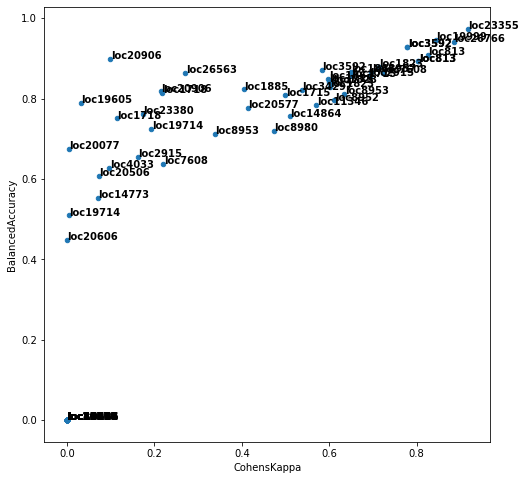

In [27]:
ax = blocstats.plot.scatter(x="CohensKappa",y="BalancedAccuracy",figsize=(8,8))
for line in range(0,blocstats.shape[0]):
     ax.text(blocstats.CohensKappa[line]+0.001, blocstats.BalancedAccuracy[line], blocstats.location[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

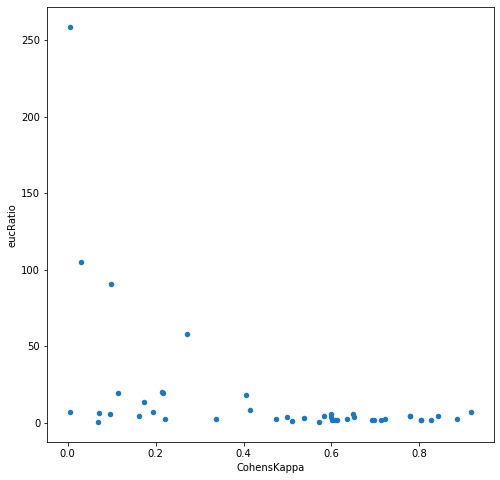

In [37]:

blocstats_er = blocstats_er[blocstats_er.CohensKappa > 0.0]
ax = blocstats_er.plot.scatter(x="CohensKappa",y="eucRatio",figsize=(8,8))

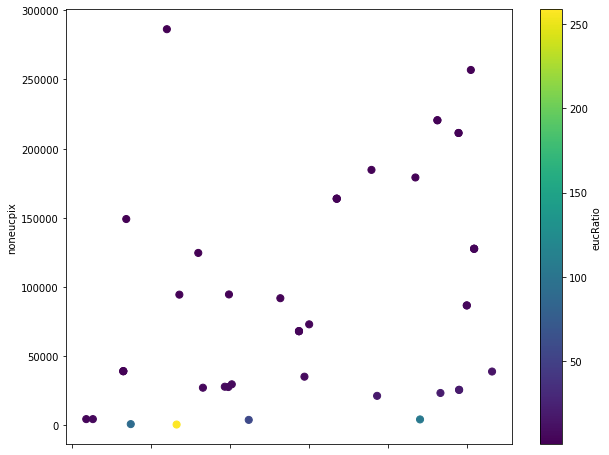

In [81]:
ax = blocstats_er.plot.scatter(x="eucpix",y="noneucpix",c="eucRatio",colormap='viridis',s=50,figsize=(10,8))

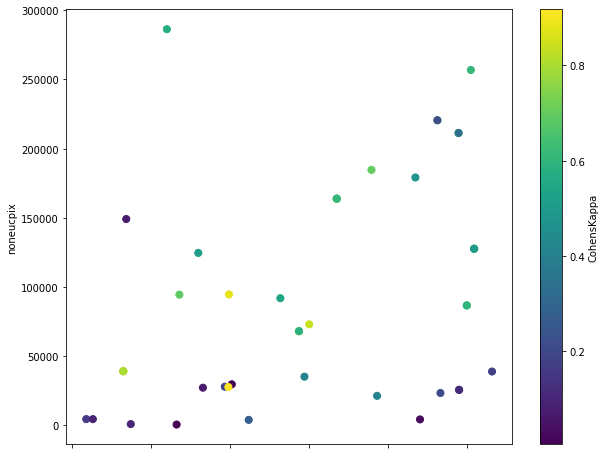

In [82]:
ax = blocstats_er.plot.scatter(x="eucpix",y="noneucpix",c="CohensKappa",colormap='viridis',s=50,figsize=(10,8))

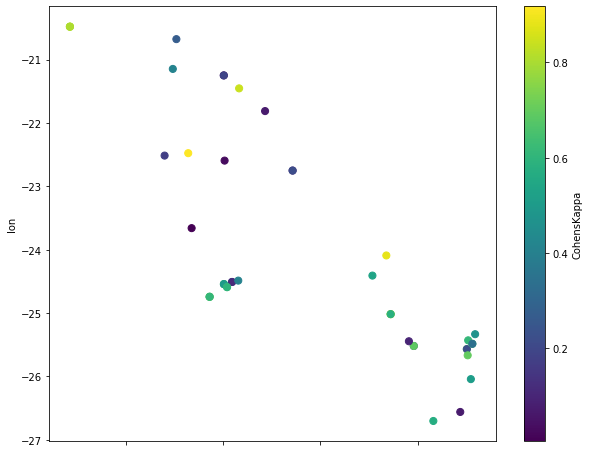

In [75]:
ax = blocstats_er.plot.scatter(x="lat",y="lon",c="CohensKappa",colormap='viridis',s=50,figsize=(10,8))

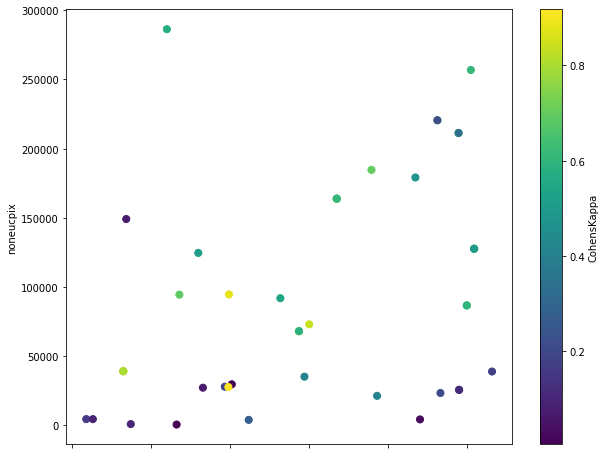

In [51]:
ax = blocstats_er.plot.scatter(x="eucpix",y="noneucpix",c="CohensKappa",colormap='viridis',s=50,figsize=(10,8))

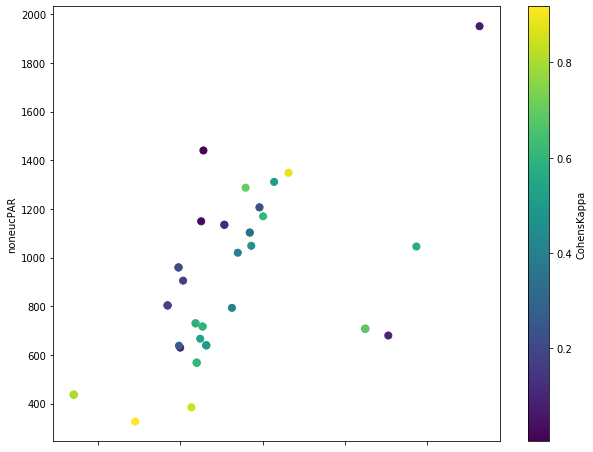

In [80]:
ax = blocstats_er.plot.scatter(x="eucPAR",y="noneucPAR",c="CohensKappa",colormap='viridis',s=50,figsize=(10,8))

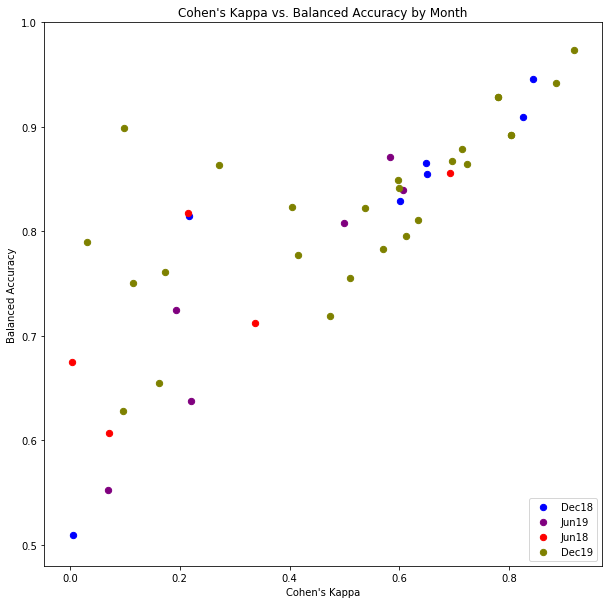

In [84]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

x=blocstats_er['CohensKappa']
y=blocstats_er['BalancedAccuracy']

# Get unique names of species
uniq = list(set(blocstats_er['month']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('brg')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = blocstats_er['month'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=40, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('Cohen\'s Kappa')
plt.ylabel('Balanced Accuracy')
plt.title('Cohen\'s Kappa vs. Balanced Accuracy by Month')
plt.legend(loc='lower right')
#import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
train 1 loc, test another
join images?
patch training

In [129]:
mq = pd.read_csv("wi.txt",sep= ",")
mq

,loc1718Dec19,loc1863Dec19,loc1885Dec19,loc19605Dec19,loc20577Dec19,loc20906Dec19,loc23355Dec19,loc23380Dec19,loc26563Dec19,loc26766Dec19,loc2915Dec19,loc34297Dec19,loc4033Dec19,loc8952Dec19,loc8953Dec19,loc8957Dec19
loc1718Dec19,NaN,0.769628,0.747896,0.518331,0.497661,0.503450,0.501173,0.499852,0.501169,0.499989,0.500377,0.495269,0.500073,0.500593,0.500836,0.499512
loc1863Dec19,NaN,NaN,0.761476,0.510492,0.501979,0.226798,0.441897,0.692791,0.294946,0.508840,0.505913,0.486690,0.475597,0.487462,0.506414,0.499713
loc1885Dec19,NaN,NaN,NaN,0.515901,0.463772,0.559054,0.549617,0.615272,0.287251,0.277855,0.499526,0.557471,0.500345,0.542496,0.529209,0.555436
loc19605Dec19,NaN,NaN,NaN,NaN,0.501810,0.184846,0.436050,0.691872,0.293683,0.507706,0.505556,0.354047,0.474736,0.487672,0.506320,0.500019
loc20577Dec19,NaN,NaN,NaN,NaN,NaN,0.239458,0.441980,0.695875,0.566894,0.478884,0.510200,0.483587,0.479956,0.607082,0.609824,0.644478
loc20906Dec19,NaN,NaN,NaN,NaN,NaN,NaN,0.499388,0.497194,0.500000,0.499962,0.427945,0.465856,0.470236,0.500000,0.500000,0.499995
loc23355Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502509,0.502303,0.554190,0.417158,0.505476,0.459467,0.584936,0.582945,0.625904
loc23380Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.530040,0.392526,0.505940,0.480766,0.475616,0.488484,0.507258,0.501780
loc26563Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563535,0.417018,0.707529,0.459353,0.492633,0.471318,0.486846
loc26766Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511639,0.751757,0.481439,0.496155,0.514516,0.510936


In [39]:
m.index  = [
  "loc1718Dec19",
  "loc1863Dec19",
  "loc1885Dec19",
  "loc19605Dec19",
  "loc20577Dec19",
  "loc20906Dec19",
  "loc23355Dec19",
  "loc23380Dec19",
  "loc26563Dec19",
  "loc26766Dec19",
  "loc2915Dec19",
  "loc34297Dec19",
  "loc4033Dec19",
  "loc8952Dec19",
  "loc8953Dec19",
  "loc8957Dec19"
]

In [45]:
m = pd.read_csv("wi.txt",sep= ",")
m

,loc1718Dec19,loc1863Dec19,loc1885Dec19,loc19605Dec19,loc20577Dec19,loc20906Dec19,loc23355Dec19,loc23380Dec19,loc26563Dec19,loc26766Dec19,loc2915Dec19,loc34297Dec19,loc4033Dec19,loc8952Dec19,loc8953Dec19,loc8957Dec19
loc1718Dec19,NaN,0.769628,0.747896,0.518331,0.497661,0.503450,0.501173,0.499852,0.501169,0.499989,0.500377,0.495269,0.500073,0.500593,0.500836,0.499512
loc1863Dec19,NaN,NaN,0.761476,0.510492,0.501979,0.226798,0.441897,0.692791,0.294946,0.508840,0.505913,0.486690,0.475597,0.487462,0.506414,0.499713
loc1885Dec19,NaN,NaN,NaN,0.515901,0.463772,0.559054,0.549617,0.615272,0.287251,0.277855,0.499526,0.557471,0.500345,0.542496,0.529209,0.555436
loc19605Dec19,NaN,NaN,NaN,NaN,0.501810,0.184846,0.436050,0.691872,0.293683,0.507706,0.505556,0.354047,0.474736,0.487672,0.506320,0.500019
loc20577Dec19,NaN,NaN,NaN,NaN,NaN,0.239458,0.441980,0.695875,0.566894,0.478884,0.510200,0.483587,0.479956,0.607082,0.609824,0.644478
loc20906Dec19,NaN,NaN,NaN,NaN,NaN,NaN,0.499388,0.497194,0.500000,0.499962,0.427945,0.465856,0.470236,0.500000,0.500000,0.499995
loc23355Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502509,0.502303,0.554190,0.417158,0.505476,0.459467,0.584936,0.582945,0.625904
loc23380Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.530040,0.392526,0.505940,0.480766,0.475616,0.488484,0.507258,0.501780
loc26563Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563535,0.417018,0.707529,0.459353,0.492633,0.471318,0.486846
loc26766Dec19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511639,0.751757,0.481439,0.496155,0.514516,0.510936


In [70]:
m.loc['loc1718Dec19']['loc1863Dec19']

0.769628046061909

In [102]:
import pyproj

In [116]:
geod = pyproj.Geod(ellps='WGS84')

lm = m.columns.to_list()

yloc = []#lm.copy()
xloc = []#lm.copy()
dist = []
accu = []

for i in lm:
    #xloc.append(i)
    x = newsub.loc[i]
    xp = Point(x.lon,x.lat)
    for j in lm:
        xloc.append(i)
        yloc.append(j)
        y = newsub.loc[j]
        yp = Point(y.lon,y.lat)
        cdist = yp.distance(xp)
        angle1,angle2,distance = geod.inv(yp.y, yp.x, xp.y, xp.x)
        #print(yp.x, yp.y, xp.x, xp.y)
        #print("{0:8.4f}".format(distance/1000))
        dist.append((distance/1000))
        accu.append(m.loc[j][i])

In [112]:
ldf = pd.DataFrame(list(zip(yloc, xloc, dist, accu)), columns =['yloc', 'xloc', 'dist', 'accu'])

In [113]:
ldfa = ldf[(np.isnan(ldf['accu']) != True)] 

In [163]:
ldfa.to_csv('ldfa.csv',index=False)
ldfa

,yloc,xloc,dist,accu
16,loc1718Dec19,loc1863Dec19,13.780292,0.769628
32,loc1718Dec19,loc1885Dec19,13.142981,0.747896
33,loc1863Dec19,loc1885Dec19,25.986734,0.761476
48,loc1718Dec19,loc19605Dec19,212.687510,0.518331
49,loc1863Dec19,loc19605Dec19,221.161102,0.510492
...,...,...,...,...
250,loc2915Dec19,loc8957Dec19,112.388268,0.500117
251,loc34297Dec19,loc8957Dec19,241.724045,0.496030
252,loc4033Dec19,loc8957Dec19,123.831773,0.500184
253,loc8952Dec19,loc8957Dec19,26.222234,0.871310


In [64]:
newsub.index = newsub["locmonth"]

In [65]:
newsub

,locmonth,lat,lon
locmonth,,,
loc11346Dec19,loc11346Dec19,152.318359,-26.703021
loc14773Jun19,loc14773Jun19,152.871379,-26.560641
loc14864Dec19,loc14864Dec19,153.089372,-26.042383
loc1715Dec18,loc1715Dec18,148.016242,-24.543252
loc1715Dec19,loc1715Dec19,148.016242,-24.543252
...,...,...,...
loc8952Dec19,loc8952Dec19,153.033798,-25.430064
loc8953Dec19,loc8953Dec19,153.120025,-25.484987
loc8953Jun18,loc8953Jun18,153.120025,-25.484987


In [ ]:
#for these locations, pull ecocodes  look for similarities in distant regions where pair comparisons are > 0.65

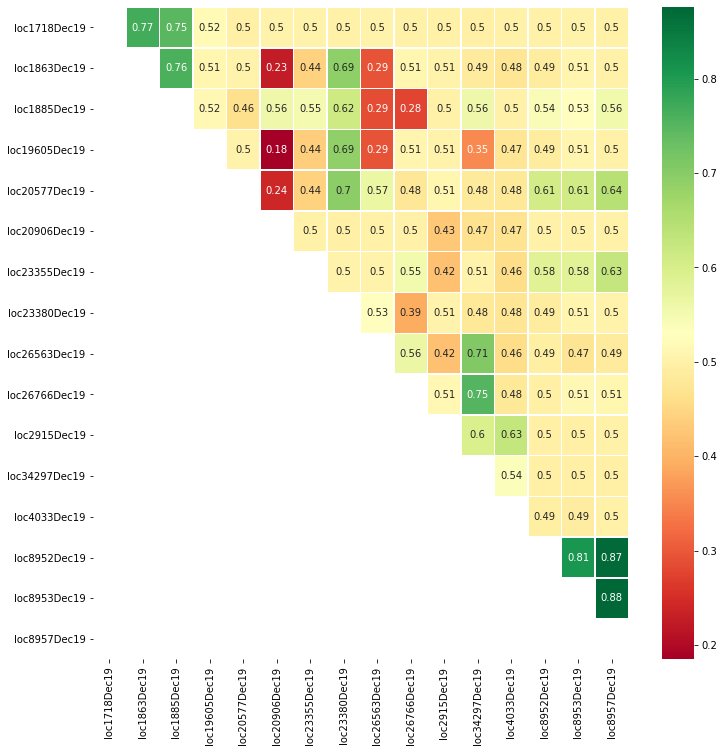

In [51]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 12))

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(m, cmap='RdYlGn', linewidths=0.5, annot=True)

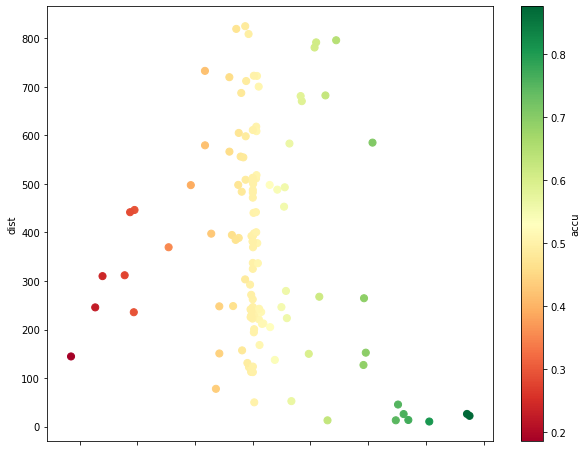

In [117]:
ax = ldfa.plot.scatter(x="accu",y="dist",c="accu",colormap='RdYlGn',s=50,figsize=(10,8))

In [144]:
tanim = pd.read_csv("tanis.csv",sep= ",")
tanim.index  = [
  "loc1718",
  "loc1863",
  "loc1885",
  "loc19605",
  "loc20577",
  "loc20906",
  "loc23355",
  "loc23380",
  "loc26563",
  "loc26766",
  "loc2915",
  "loc34297",
  "loc4033",
  "loc8952",
  "loc8953",
  "loc8957"
]
tanim


,loc1718,loc1863,loc1885,loc19605,loc20577,loc20906,loc23355,loc23380,loc26563,loc26766,loc2915,loc34297,loc4033,loc8952,loc8953,loc8957
loc1718,1.000000,0.750000,0.777778,0.190476,0.046512,0.058824,0.160000,0.023810,0.032258,0.022727,0.000000,0.033898,0.000000,0.000000,0.000000,NaN
loc1863,0.750000,1.000000,0.650000,0.130435,0.022222,0.057143,0.071429,0.000000,0.031250,0.022222,0.000000,0.050847,0.000000,0.000000,0.000000,NaN
loc1885,0.777778,0.650000,1.000000,0.210526,0.048780,0.096774,0.173913,0.025000,0.034483,0.023810,0.000000,0.053571,0.000000,0.000000,0.000000,NaN
loc19605,0.190476,0.130435,0.210526,1.000000,0.125000,0.125000,0.333333,0.096774,0.150000,0.090909,0.000000,0.083333,0.000000,0.000000,0.000000,NaN
loc20577,0.046512,0.022222,0.048780,0.125000,1.000000,0.093023,0.081081,0.173913,0.343750,0.056604,0.000000,0.058824,0.000000,0.000000,0.000000,NaN
loc20906,0.058824,0.057143,0.096774,0.125000,0.093023,1.000000,0.148148,0.046512,0.133333,0.119048,0.000000,0.125000,0.000000,0.000000,0.000000,NaN
loc23355,0.160000,0.071429,0.173913,0.333333,0.081081,0.148148,1.000000,0.085714,0.080000,0.081081,0.000000,0.056604,0.000000,0.000000,0.000000,NaN
loc23380,0.023810,0.000000,0.025000,0.096774,0.173913,0.046512,0.085714,1.000000,0.171429,0.018868,0.000000,0.029412,0.000000,0.000000,0.000000,NaN
loc26563,0.032258,0.031250,0.034483,0.150000,0.343750,0.133333,0.080000,0.171429,1.000000,0.075000,0.000000,0.072727,0.000000,0.000000,0.000000,NaN
loc26766,0.022727,0.022222,0.023810,0.090909,0.056604,0.119048,0.081081,0.018868,0.075000,1.000000,0.169811,0.309091,0.200000,0.047619,0.076923,NaN


In [167]:
tanimb = pd.read_csv("tanis.csv",sep= ",")
tanim.index  = [
  "loc1718",
  "loc1863",
  "loc1885",
  "loc19605",
  "loc20577",
  "loc20906",
  "loc23355",
  "loc23380",
  "loc26563",
  "loc26766",
  "loc2915",
  "loc34297",
  "loc4033",
  "loc8952",
  "loc8953",
  "loc8957"
]
tanimb



,loc1718,loc1863,loc1885,loc19605,loc20577,loc20906,loc23355,loc23380,loc26563,loc26766,loc2915,loc34297,loc4033,loc8952,loc8953,loc8957
0,1.000000,0.750000,0.777778,0.190476,0.046512,0.058824,0.160000,0.023810,0.032258,0.022727,0.000000,0.033898,0.000000,0.000000,0.000000,NaN
1,0.750000,1.000000,0.650000,0.130435,0.022222,0.057143,0.071429,0.000000,0.031250,0.022222,0.000000,0.050847,0.000000,0.000000,0.000000,NaN
2,0.777778,0.650000,1.000000,0.210526,0.048780,0.096774,0.173913,0.025000,0.034483,0.023810,0.000000,0.053571,0.000000,0.000000,0.000000,NaN
3,0.190476,0.130435,0.210526,1.000000,0.125000,0.125000,0.333333,0.096774,0.150000,0.090909,0.000000,0.083333,0.000000,0.000000,0.000000,NaN
4,0.046512,0.022222,0.048780,0.125000,1.000000,0.093023,0.081081,0.173913,0.343750,0.056604,0.000000,0.058824,0.000000,0.000000,0.000000,NaN
5,0.058824,0.057143,0.096774,0.125000,0.093023,1.000000,0.148148,0.046512,0.133333,0.119048,0.000000,0.125000,0.000000,0.000000,0.000000,NaN
6,0.160000,0.071429,0.173913,0.333333,0.081081,0.148148,1.000000,0.085714,0.080000,0.081081,0.000000,0.056604,0.000000,0.000000,0.000000,NaN
7,0.023810,0.000000,0.025000,0.096774,0.173913,0.046512,0.085714,1.000000,0.171429,0.018868,0.000000,0.029412,0.000000,0.000000,0.000000,NaN
8,0.032258,0.031250,0.034483,0.150000,0.343750,0.133333,0.080000,0.171429,1.000000,0.075000,0.000000,0.072727,0.000000,0.000000,0.000000,NaN
9,0.022727,0.022222,0.023810,0.090909,0.056604,0.119048,0.081081,0.018868,0.075000,1.000000,0.169811,0.309091,0.200000,0.047619,0.076923,NaN


In [137]:
tanim.shape

(16, 16)

In [139]:
m.shape

(16, 16)

In [135]:
tanimq = pd.read_csv("tanimotoREm.txt",sep= ",")
tanimq

,loc1718,loc1863,loc1885,loc19605,loc20577,loc20906,loc23355,loc23380,loc26563,loc26766,loc2915,loc34297,loc4033,loc8952,loc8953,loc8957
0,loc1718,1.000000,0.750000,0.777778,0.190476,0.046512,0.058824,0.160000,0.023810,0.032258,0.022727,0.000000,0.033898,0.000000,0.000000,0.000000
1,loc1863,0.750000,1.000000,0.650000,0.130435,0.022222,0.057143,0.071429,0.000000,0.031250,0.022222,0.000000,0.050847,0.000000,0.000000,0.000000
2,loc1885,0.777778,0.650000,1.000000,0.210526,0.048780,0.096774,0.173913,0.025000,0.034483,0.023810,0.000000,0.053571,0.000000,0.000000,0.000000
3,loc19605,0.190476,0.130435,0.210526,1.000000,0.125000,0.125000,0.333333,0.096774,0.150000,0.090909,0.000000,0.083333,0.000000,0.000000,0.000000
4,loc20577,0.046512,0.022222,0.048780,0.125000,1.000000,0.093023,0.081081,0.173913,0.343750,0.056604,0.000000,0.058824,0.000000,0.000000,0.000000
5,loc20906,0.058824,0.057143,0.096774,0.125000,0.093023,1.000000,0.148148,0.046512,0.133333,0.119048,0.000000,0.125000,0.000000,0.000000,0.000000
6,loc23355,0.160000,0.071429,0.173913,0.333333,0.081081,0.148148,1.000000,0.085714,0.080000,0.081081,0.000000,0.056604,0.000000,0.000000,0.000000
7,loc23380,0.023810,0.000000,0.025000,0.096774,0.173913,0.046512,0.085714,1.000000,0.171429,0.018868,0.000000,0.029412,0.000000,0.000000,0.000000
8,loc26563,0.032258,0.031250,0.034483,0.150000,0.343750,0.133333,0.080000,0.171429,1.000000,0.075000,0.000000,0.072727,0.000000,0.000000,0.000000
9,loc26766,0.022727,0.022222,0.023810,0.090909,0.056604,0.119048,0.081081,0.018868,0.075000,1.000000,0.169811,0.309091,0.200000,0.047619,0.076923


In [166]:
tanimq2 = pd.read_csv("ttan2.txt",sep= ",")
tanimq2.index  = [
  "loc1718",
  "loc1863",
  "loc1885",
  "loc19605",
  "loc20577",
  "loc20906",
  "loc23355",
  "loc23380",
  "loc26563",
  "loc26766",
  "loc2915",
  "loc34297",
  "loc4033",
  "loc8952",
  "loc8953",
  "loc8957"
]
tanimq2

,loc1718,loc1863,loc1885,loc19605,loc20577,loc20906,loc23355,loc23380,loc26563,loc26766,loc2915,loc34297,loc4033,loc8952,loc8953,loc8957
loc1718,0.750000,0.777778,0.190476,0.046512,0.058824,0.160000,0.023810,0.032258,0.022727,0.000000,0.033898,0.000000,0.000000,0.000000,0.000000,NaN
loc1863,1.000000,0.650000,0.130435,0.022222,0.057143,0.071429,0.000000,0.031250,0.022222,0.000000,0.050847,0.000000,0.000000,0.000000,0.000000,NaN
loc1885,0.650000,1.000000,0.210526,0.048780,0.096774,0.173913,0.025000,0.034483,0.023810,0.000000,0.053571,0.000000,0.000000,0.000000,0.000000,NaN
loc19605,0.130435,0.210526,1.000000,0.125000,0.125000,0.333333,0.096774,0.150000,0.090909,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,NaN
loc20577,0.022222,0.048780,0.125000,1.000000,0.093023,0.081081,0.173913,0.343750,0.056604,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,NaN
loc20906,0.057143,0.096774,0.125000,0.093023,1.000000,0.148148,0.046512,0.133333,0.119048,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,NaN
loc23355,0.071429,0.173913,0.333333,0.081081,0.148148,1.000000,0.085714,0.080000,0.081081,0.000000,0.056604,0.000000,0.000000,0.000000,0.000000,NaN
loc23380,0.000000,0.025000,0.096774,0.173913,0.046512,0.085714,1.000000,0.171429,0.018868,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,NaN
loc26563,0.031250,0.034483,0.150000,0.343750,0.133333,0.080000,0.171429,1.000000,0.075000,0.000000,0.072727,0.000000,0.000000,0.000000,0.000000,NaN
loc26766,0.022222,0.023810,0.090909,0.056604,0.119048,0.081081,0.018868,0.075000,1.000000,0.169811,0.309091,0.200000,0.047619,0.076923,0.068182,NaN


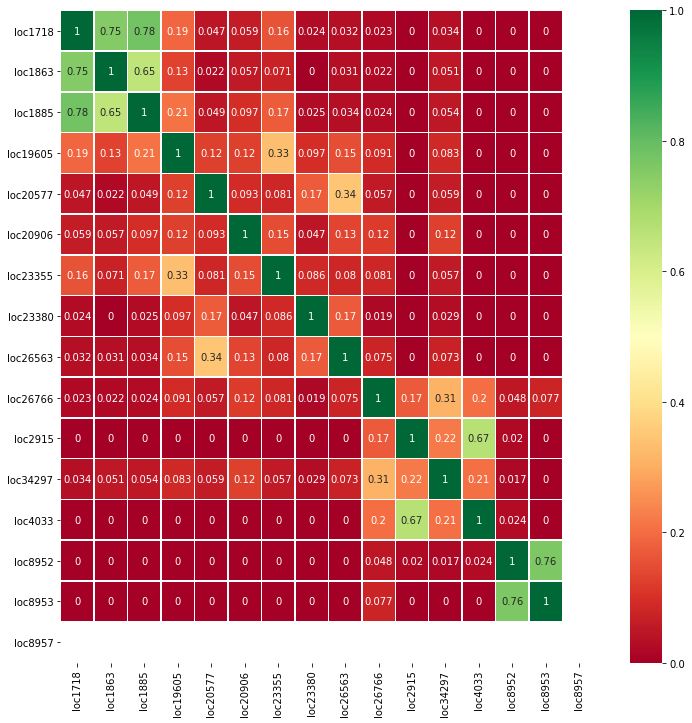

In [145]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 12))

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(tanim, cmap='RdYlGn', linewidths=0.5, annot=True)

In [271]:
tanigs = pd.read_csv("gstani.csv",sep= " ")
tanigs.index  = [
  "loc1718",
  "loc1863",
  "loc1885",
  "loc19605",
  "loc20577",
  "loc20906",
  "loc23355",
  "loc23380",
  "loc26563",
  "loc26766",
  "loc2915",
  "loc34297",
  "loc4033",
  "loc8952",
  "loc8953",
  "loc8957"
]
tanigs

,loc1718,loc1863,loc1885,loc19605,loc20577,loc20906,loc23355,loc23380,loc26563,loc26766,loc2915,loc34297,loc4033,loc8952,loc8953,loc8957
loc1718,0.809955,1.171053,0.578313,0.248927,0.434783,0.606383,0.206413,0.411765,0.252396,0.217582,0.180583,0.274854,0.233645,0.138756,0.188285,NaN
loc1863,1.000000,1.188679,0.400000,0.224490,0.392000,0.531100,0.176471,0.352459,0.205882,0.214437,0.154982,0.264624,0.189873,0.108225,0.157088,NaN
loc1885,0.574661,1.000000,0.627907,0.196388,0.362745,0.562500,0.165254,0.397849,0.240876,0.170163,0.155925,0.222930,0.239766,0.148148,0.189744,NaN
loc19605,0.266968,0.478873,1.000000,0.149254,0.329114,0.516667,0.131455,0.381295,0.230769,0.109974,0.132251,0.157509,0.230769,0.156863,0.171429,NaN
loc20577,0.452785,0.596386,0.434783,1.000000,0.577381,0.516616,0.476980,0.969231,0.286957,0.238095,0.216867,0.277108,0.211488,0.123077,0.186275,NaN
loc20906,0.293680,0.418367,0.428571,0.201814,1.000000,0.470588,0.175214,0.413043,0.283019,0.178404,0.153527,0.242718,0.211429,0.127273,0.154229,NaN
loc23355,0.409692,0.712329,0.685185,0.233415,0.524390,1.000000,0.222482,0.380952,0.209302,0.164619,0.125800,0.231834,0.218543,0.144928,0.159091,NaN
loc23380,0.569620,0.964286,1.042373,0.895981,0.877133,1.309735,1.000000,0.727273,0.387755,0.341421,0.310127,0.429194,0.267016,0.159494,0.226277,NaN
loc26563,0.279070,0.420765,0.613445,0.230769,0.436464,0.397590,0.179601,1.000000,0.293173,0.144208,0.161987,0.196078,0.259740,0.158621,0.209040,NaN
loc26766,0.394558,0.517857,0.638554,0.228216,0.545455,0.437788,0.211881,0.526066,1.000000,0.392593,0.410959,0.554007,0.513812,0.221675,0.367442,NaN


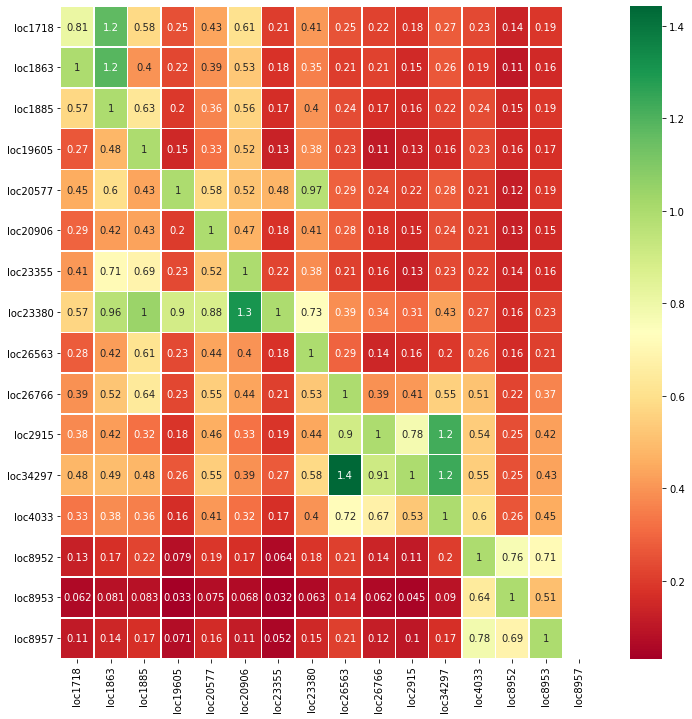

In [272]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 12))

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(tanigs, cmap='RdYlGn', linewidths=0.5, annot=True)

In [125]:
do above for km dist and for temporal, day dist

In [146]:
ba2 = pd.read_csv("balacc.txt",sep= ",")
ba2

,loc1718,loc1863,loc1885,loc19605,loc20577,loc20906,loc23355,loc23380,loc26563,loc26766,loc2915,loc34297,loc4033,loc8952,loc8953,loc8957
loc1718,NaN,0.769628,0.747896,0.518331,0.497661,0.503450,0.501173,0.499852,0.501169,0.499989,0.500377,0.495269,0.500073,0.500593,0.500836,0.499512
loc1863,NaN,NaN,0.761476,0.510492,0.501979,0.226798,0.441897,0.692791,0.294946,0.508840,0.505913,0.486690,0.475597,0.487462,0.506414,0.499713
loc1885,NaN,NaN,NaN,0.515901,0.463772,0.559054,0.549617,0.615272,0.287251,0.277855,0.499526,0.557471,0.500345,0.542496,0.529209,0.555436
loc19605,NaN,NaN,NaN,NaN,0.501810,0.184846,0.436050,0.691872,0.293683,0.507706,0.505556,0.354047,0.474736,0.487672,0.506320,0.500019
loc20577,NaN,NaN,NaN,NaN,NaN,0.239458,0.441980,0.695875,0.566894,0.478884,0.510200,0.483587,0.479956,0.607082,0.609824,0.644478
loc20906,NaN,NaN,NaN,NaN,NaN,NaN,0.499388,0.497194,0.500000,0.499962,0.427945,0.465856,0.470236,0.500000,0.500000,0.499995
loc23355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502509,0.502303,0.554190,0.417158,0.505476,0.459467,0.584936,0.582945,0.625904
loc23380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.530040,0.392526,0.505940,0.480766,0.475616,0.488484,0.507258,0.501780
loc26563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563535,0.417018,0.707529,0.459353,0.492633,0.471318,0.486846
loc26766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511639,0.751757,0.481439,0.496155,0.514516,0.510936


In [ ]:
ax = ldfa.plot.scatter(x="accu",y="dist",c="accu",colormap='RdYlGn',s=50,figsize=(10,8))

In [147]:
pldf = pd.DataFrame(list(zip(yloc, xloc, dist, accu)), columns =['yloc', 'xloc', 'dist', 'accu'])

In [149]:
pldfa = ldf[(np.isnan(pldf['accu']) != True)] 

In [150]:
pldfa

,yloc,xloc,dist,accu
16,loc1718Dec19,loc1863Dec19,13.780292,0.769628
32,loc1718Dec19,loc1885Dec19,13.142981,0.747896
33,loc1863Dec19,loc1885Dec19,25.986734,0.761476
48,loc1718Dec19,loc19605Dec19,212.687510,0.518331
49,loc1863Dec19,loc19605Dec19,221.161102,0.510492
...,...,...,...,...
250,loc2915Dec19,loc8957Dec19,112.388268,0.500117
251,loc34297Dec19,loc8957Dec19,241.724045,0.496030
252,loc4033Dec19,loc8957Dec19,123.831773,0.500184
253,loc8952Dec19,loc8957Dec19,26.222234,0.871310


In [285]:
lta = pd.read_csv('ldita.csv')
lta

,loca,locb,dist,acc,tanimoto
0,loc1718,loc1863,13.780292,0.769628,0.750000
1,loc1718,loc1885,13.142981,0.747896,0.777778
2,loc1718,loc19605,212.687510,0.518331,0.190476
3,loc1718,loc20577,392.716493,0.497661,0.046512
4,loc1718,loc20906,232.432817,0.503450,0.058824
...,...,...,...,...,...
115,loc4033,loc8953,131.186667,0.490608,0.000000
116,loc4033,loc8957,123.831773,0.500184,0.000000
117,loc8952,loc8953,10.593589,0.805925,0.764706
118,loc8952,loc8957,26.222234,0.871310,0.750000


In [286]:
lta.corr()

,dist,acc,tanimoto
dist,1.000000,-0.215908,-0.597932
acc,-0.215908,1.000000,0.590834
tanimoto,-0.597932,0.590834,1.000000


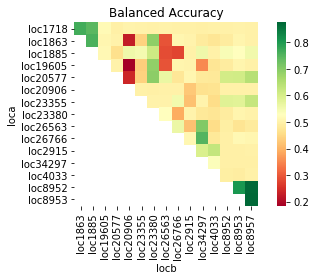

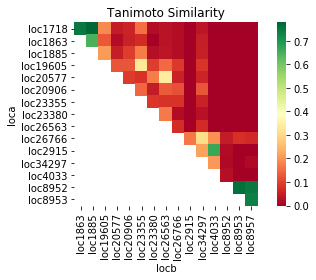

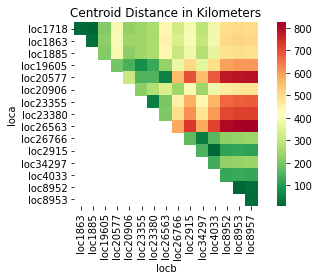

In [242]:
piv = pd.pivot_table(lta, values="acc",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn')
ax .set(title = "Balanced Accuracy") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
piv = pd.pivot_table(lta, values="tanimoto",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn')
ax .set(title = "Tanimoto Similarity") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
piv = pd.pivot_table(lta, values="dist",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn_r')
ax .set(title = "Centroid Distance in Kilometers") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

In [281]:
ltat = pd.read_csv('gstani2.csv',delimiter=' ')

In [282]:
ltat

,loca,locb,tanimoto
0,loc1718,loc1863,0.809955
1,loc1718,loc1885,1.171053
2,loc1718,loc19605,0.578313
3,loc1718,loc20577,0.248927
4,loc1718,loc20906,0.434783
...,...,...,...
115,loc4033,loc8953,0.258621
116,loc4033,loc8957,0.450644
117,loc8952,loc8953,0.764706
118,loc8952,loc8957,0.711340


In [287]:
ltac = lta.copy()
ltac

,loca,locb,dist,acc,tanimoto
0,loc1718,loc1863,13.780292,0.769628,0.750000
1,loc1718,loc1885,13.142981,0.747896,0.777778
2,loc1718,loc19605,212.687510,0.518331,0.190476
3,loc1718,loc20577,392.716493,0.497661,0.046512
4,loc1718,loc20906,232.432817,0.503450,0.058824
...,...,...,...,...,...
115,loc4033,loc8953,131.186667,0.490608,0.000000
116,loc4033,loc8957,123.831773,0.500184,0.000000
117,loc8952,loc8953,10.593589,0.805925,0.764706
118,loc8952,loc8957,26.222234,0.871310,0.750000


In [289]:
ltac['tanimoto_gs'] = ltat['tanimoto'].values

In [291]:
ltac.corr()

,dist,acc,tanimoto,tanimoto_gs
dist,1.000000,-0.215908,-0.597932,-0.609631
acc,-0.215908,1.000000,0.590834,0.296258
tanimoto,-0.597932,0.590834,1.000000,0.741734
tanimoto_gs,-0.609631,0.296258,0.741734,1.000000


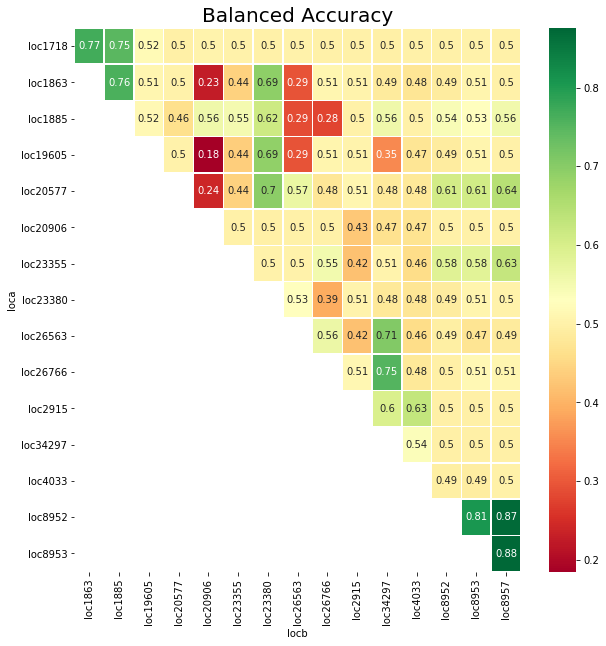

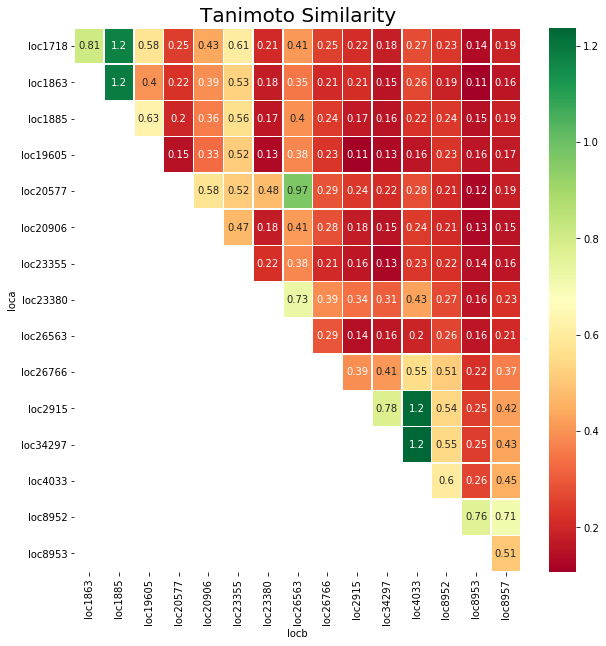

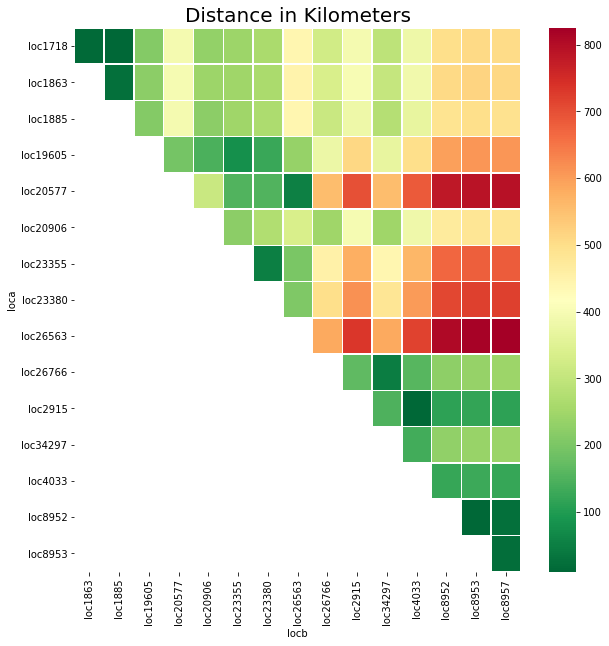

In [292]:
pivacc = pd.pivot_table(ltac, values="acc",index=["loca"], columns=["locb"], fill_value=NaN)
pivtan = pd.pivot_table(ltac, values="tanimoto_gs",index=["loca"], columns=["locb"], fill_value=NaN)
pivdist = pd.pivot_table(ltac, values="dist",index=["loca"], columns=["locb"], fill_value=NaN)
plt.figure(figsize=(10, 10))
plt.title("Balanced Accuracy", fontsize =20)
sns.heatmap(pivacc, cmap='RdYlGn', linewidths=0.5, annot=True)
plt.figure(figsize=(10, 10))
plt.title("Tanimoto Similarity", fontsize =20)
sns.heatmap(pivtan, cmap='RdYlGn', linewidths=0.5, annot=True)
plt.figure(figsize=(10, 10))
plt.title("Distance in Kilometers", fontsize =20)
sns.heatmap(pivdist, cmap='RdYlGn_r', linewidths=0.5)

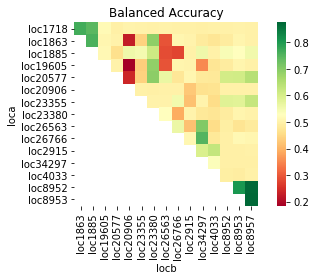

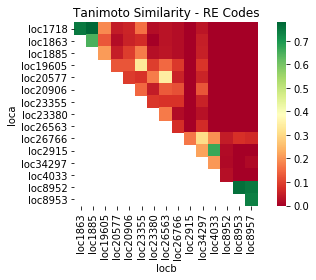

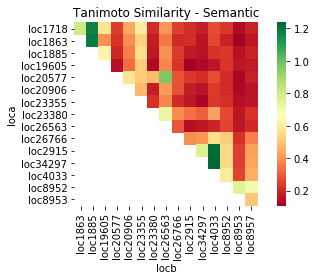

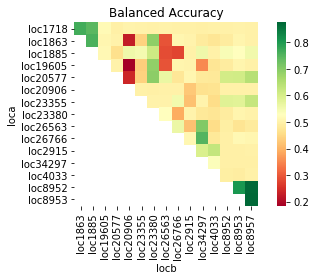

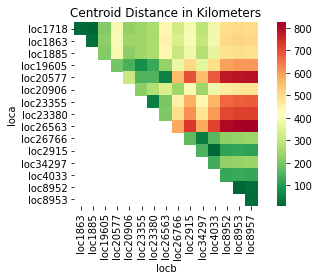

In [298]:
piv = pd.pivot_table(ltac, values="acc",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn')
ax .set(title = "Balanced Accuracy") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
piv = pd.pivot_table(ltac, values="tanimoto",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn')
ax .set(title = "Tanimoto Similarity - RE Codes") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
piv = pd.pivot_table(ltac, values="tanimoto_gs",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn')
ax .set(title = "Tanimoto Similarity - Semantic") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
piv = pd.pivot_table(ltac, values="acc",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn')
ax .set(title = "Balanced Accuracy") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
piv = pd.pivot_table(ltac, values="dist",index=["loca"], columns=["locb"], fill_value=NaN)
ax = sns.heatmap(piv, square=True, cmap='RdYlGn_r')
ax .set(title = "Centroid Distance in Kilometers") 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

In [222]:
#SimTanimoto(A,B)=bothAB/onlyA+onlyB+bothAB

In [203]:
pivacc = pd.pivot_table(lta, values="acc",index=["loca"], columns=["locb"], fill_value=NaN)
pivtan = pd.pivot_table(lta, values="tanimoto",index=["loca"], columns=["locb"], fill_value=NaN)
pivdist = pd.pivot_table(lta, values="dist",index=["loca"], columns=["locb"], fill_value=NaN)

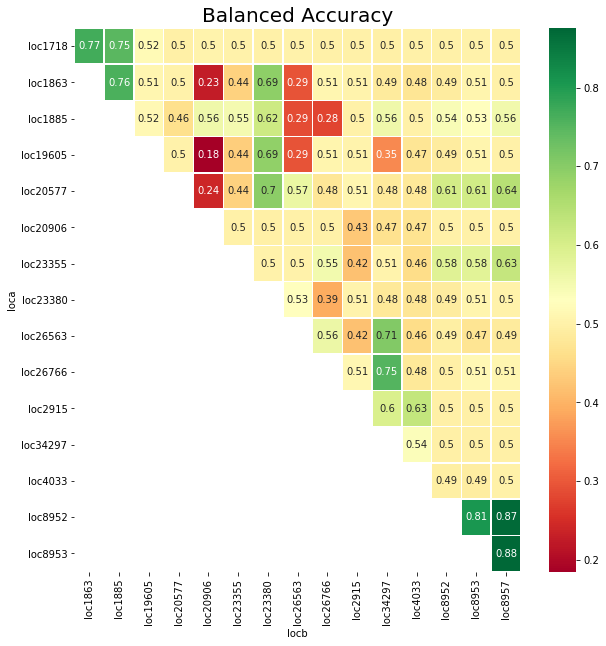

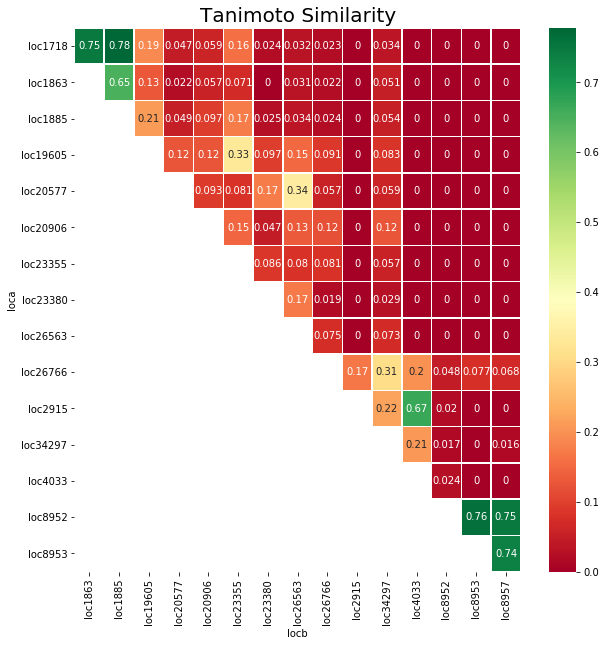

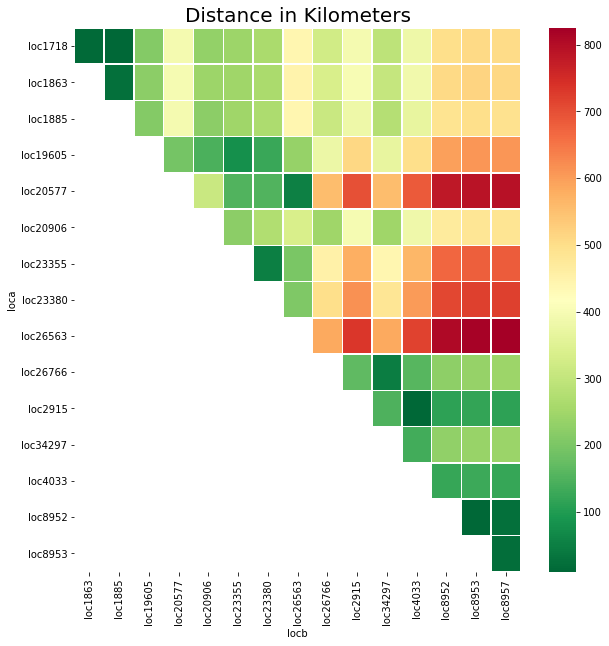

In [220]:
plt.figure(figsize=(10, 10))
plt.title("Balanced Accuracy", fontsize =20)
sns.heatmap(pivacc, cmap='RdYlGn', linewidths=0.5, annot=True)
plt.figure(figsize=(10, 10))
plt.title("Tanimoto Similarity", fontsize =20)
sns.heatmap(pivtan, cmap='RdYlGn', linewidths=0.5, annot=True)
plt.figure(figsize=(10, 10))
plt.title("Distance in Kilometers", fontsize =20)
sns.heatmap(pivdist, cmap='RdYlGn_r', linewidths=0.5)

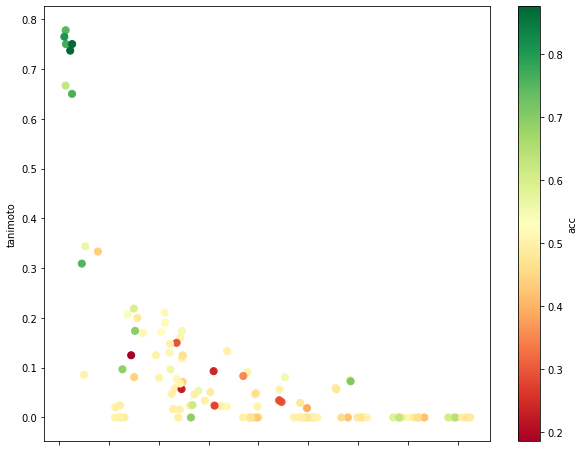

In [175]:
ax = lta.plot.scatter(x="dist",y="tanimoto",c="acc",colormap='RdYlGn',s=50,figsize=(10,8))

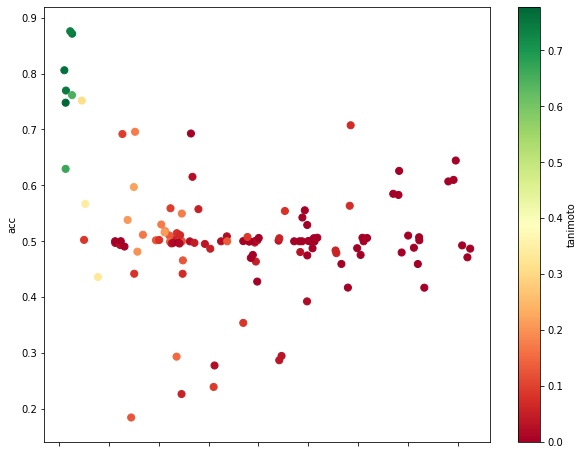

In [243]:
ax = lta.plot.scatter(x="dist",y="acc",c="tanimoto",colormap='RdYlGn',s=50,figsize=(10,8))

KeyError: 0

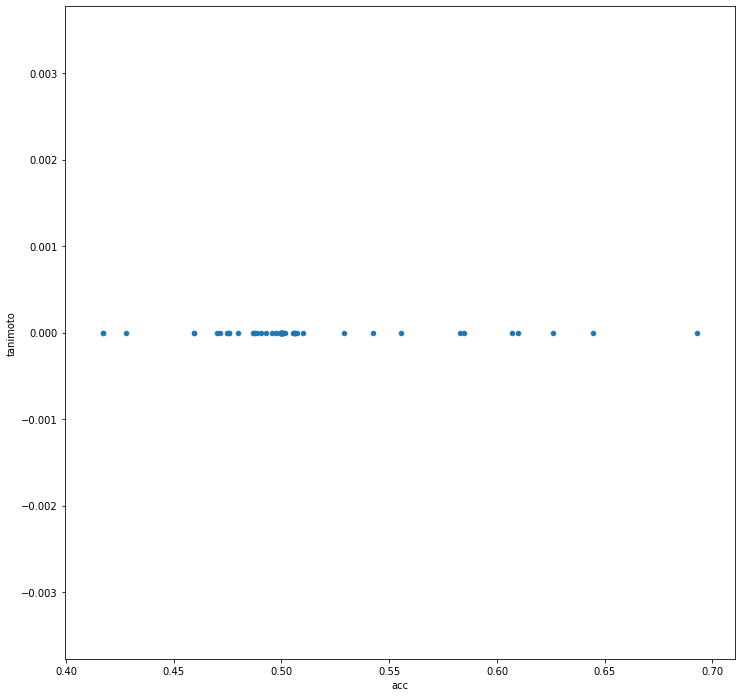

In [251]:
ltax = lta[lta.tanimoto<0.01]
ax = ltax.plot.scatter(x="acc",y="tanimoto",figsize=(12,12))
for line in range(0,ltax.shape[0]):
     ax.text(ltax.acc[line]+0.001, ltax.tanimoto[line], f"{ltax.loca[line]}_{ltax.locb[line]}", horizontalalignment='left', size='medium', color='black', weight='semibold')

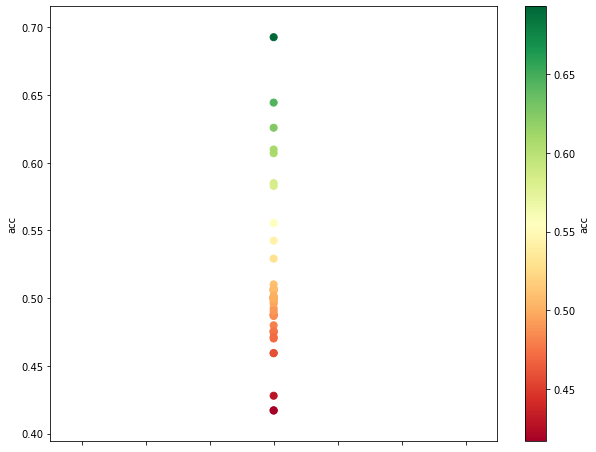

In [263]:
#ltax
ltax = lta[lta.tanimoto<0.01]
ax = ltax.plot.scatter(x="tanimoto",y="acc",c="acc",colormap='RdYlGn',s=50,figsize=(10,8))
#ax = ltax.plot.scatter(x="acc",y="tanimoto",figsize=(12,12))
#for line in range(0,ltax.shape[0]):
#     ax.text(ltax.acc[line]+0.001, ltax.tanimoto[line], f"{ltax.loca[line]}_{ltax.locb[line]}", horizontalalignment='left', size='medium', color='black', weight='semibold')

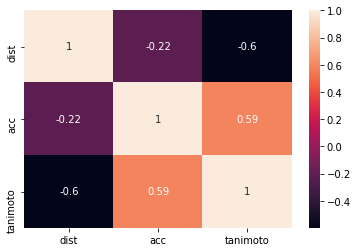

In [208]:
corrMatrix = lta.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

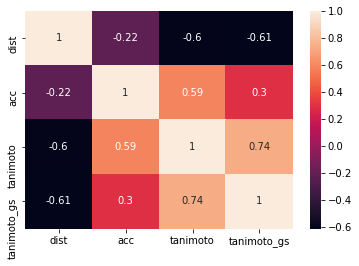

In [297]:
corrMatrix = ltac.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [260]:
lts = ltax.sort_values(['acc'],ascending=[0])
lts.head()

,loca,locb,dist,acc,tanimoto
20,loc1863,loc23380,264.565945,0.692791,0.0
64,loc20577,loc8957,795.968477,0.644478,0.0
83,loc23355,loc8957,682.334085,0.625904,0.0
63,loc20577,loc8953,791.595568,0.609824,0.0
62,loc20577,loc8952,781.003829,0.607082,0.0


In [268]:
with open("recodes_loc1863.txt.csv","r") as f:
    string = f.read()
    
print(string)

11.8.4 "Eucalyptus melanophloia and/or E. crebra +/- E. orgadophila +/- Corymbia erythrophloia grassy open woodland. Macrozamia moorei is a conspicuous element of the mid layer in the Central Highlands. Localised patches of Corymbia citriodora occur on volcanic" 1
11.8.5 "Eucalyptus orgadophila grassy open woodland. Eucalyptus orgadophila predominates and forms a distinct but discontinuous canopy sometimes with other sub-dominant species such as Corymbia erythrophloia, E. melanophloia and occasionally E. crebra. Shrubs ar" 1
11.8.2 "Eucalyptus tereticornis predominates and together with other tree species forms a distinct but discontinuous canopy (14-23m high). Eucalyptus melliodora is usually present in the canopy and often is codominant. Scattered E. longirostrata, E. saligna or E" 1
11.10.13a "Open forest (to woodland) with a range of canopy species including Eucalyptus cloeziana, E. melanoleuca, E. sphaerocarpa, Corymbia bunites, C. hendersonii, C. trachyphloia, E. suffulgens, C. l

In [269]:
with open("recodes_loc23380.txt.csv","r") as f:
    string = f.read()
    
print(string)

11.11.15 "Eucalyptus crebra +/- Corymbia erythrophloia +/- E. populnea +/- E. melanophloia +/- C. tessellaris +/- C. clarksoniana woodland to open woodland often with a shrubby layer. Eucalyptus exserta and E. platyphylla present in central coastal part of bioregi" 1
11.11.15d "Eucalyptus crebra +/- Corymbia erythrophloia +/- E. populnea +/- E. melanophloia +/- C. tessellaris +/- C. clarksoniana woodland to open woodland often with a shrubby layer. Eucalyptus exserta and E. platyphylla present in central coastal part of bioregi" 1
11.11.9 "Eucalyptus populnea or E. brownii woodland to open woodland. Occurs on undulating rises and lower slopes of hills formed on moderately to strongly deformed and metamorphosed sediments and interbedded volcanics. (BVG1M: 17a)" 1
11.5.3 "Eucalyptus populnea +/- E. melanophloia +/- Corymbia clarksoniana +/- C. dallachiana and occasionally E. cambageana or E. brownii dominate the tree layer (14m median height and 11-15m range) woodland. Localised areas ma

In [ ]:

ax = locstats.plot.scatter(x="CohensKappa",y="BalancedAccuracy",figsize=(8,8))
for line in range(0,locstats.shape[0]):
     ax.text(locstats.CohensKappa[line]+0.001, locstats.BalancedAccuracy[line], locstats.location[line], horizontalalignment='left', size='medium', color='black', weight='semibold')